# ACT. PREPROCESAMIENTO
Chiara Bombardieri Balanzá - A01659462  
Gerardo Javier Lopez García - A01660262

# Hipótesis
A mayor inversión económica en la producción, mayor será el rating del anime.

# Preprocesamiento de datos

In [6]:
import pandas as pd 
anime= pd.read_csv('most_watched_anime_dataset_100_entries.csv')
anime


,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
0,Fullmetal Alchemist,Brazil,8.8,317.0,Ufotable,80.61,1998.0,Fantasy,NaN
1,Haikyuu!!,Mexico,9.2,420.0,MAPPA,74.99,2022.0,Adventure,59.0
2,NaN,South Korea,7.4,419.0,A-1 Pictures,59.05,2009.0,Mystery,56.0
3,Bleach,Brazil,6.4,NaN,Ufotable,45.35,2002.0,Fantasy,55.0
4,Sword Art Online,NaN,9.8,327.0,Madhouse,15.90,2017.0,NaN,43.0
...,...,...,...,...,...,...,...,...,...
95,Tokyo Ghoul,Philippines,6.5,499.0,NaN,40.62,NaN,Psychological,51.0
96,Attack on Titan,Brazil,8.8,248.0,Pierrot,54.69,1993.0,Sci-Fi,57.0
97,NaN,Argentina,8.2,384.0,Madhouse,39.73,2014.0,NaN,52.0
98,Jujutsu Kaisen,India,7.2,396.0,Pierrot,68.53,1992.0,Sci-Fi,42.0


In [18]:
anime_ratings_budget = anime[['Ratings', 'Budget (in Million USD)']]
anime_ratings_budget

,Ratings,Budget (in Million USD)
0,8.8,80.61
1,9.2,74.99
2,7.4,59.05
3,6.4,45.35
4,9.8,15.90
...,...,...
95,6.5,40.62
96,8.8,54.69
97,8.2,39.73
98,7.2,68.53


In [43]:

calculos = anime.groupby('Budget Range')['Ratings'].agg(['mean', 'median', 'std']).reset_index()
calculos

/var/folders/gr/yfhxd1k551nfvndg49kvgz9c0000gn/T/ipykernel_43910/1347112263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calculos = anime.groupby('Budget Range')['Ratings'].agg(['mean', 'median', 'std']).reset_index()


,Budget Range,mean,median,std
0,Bajo,8.014286,8.0,1.087789
1,Media,7.907692,7.5,1.111728
2,Alto,8.321053,8.1,1.006964
3,May Alto,8.840000,9.4,1.274923


## EDA

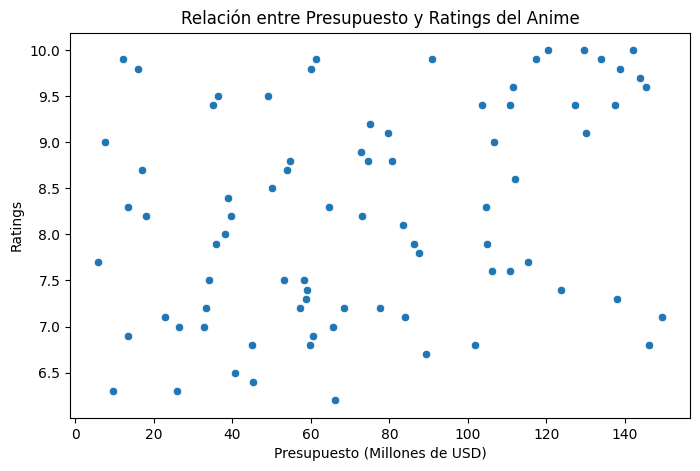

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

anime_ratings_budget = anime[['Ratings', 'Budget (in Million USD)']]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=anime_ratings_budget['Budget (in Million USD)'], y=anime_ratings_budget['Ratings'])
plt.xlabel("Presupuesto (Millones de USD)")
plt.ylabel("Ratings")
plt.title("Relación entre Presupuesto y Ratings del Anime")
plt.show()




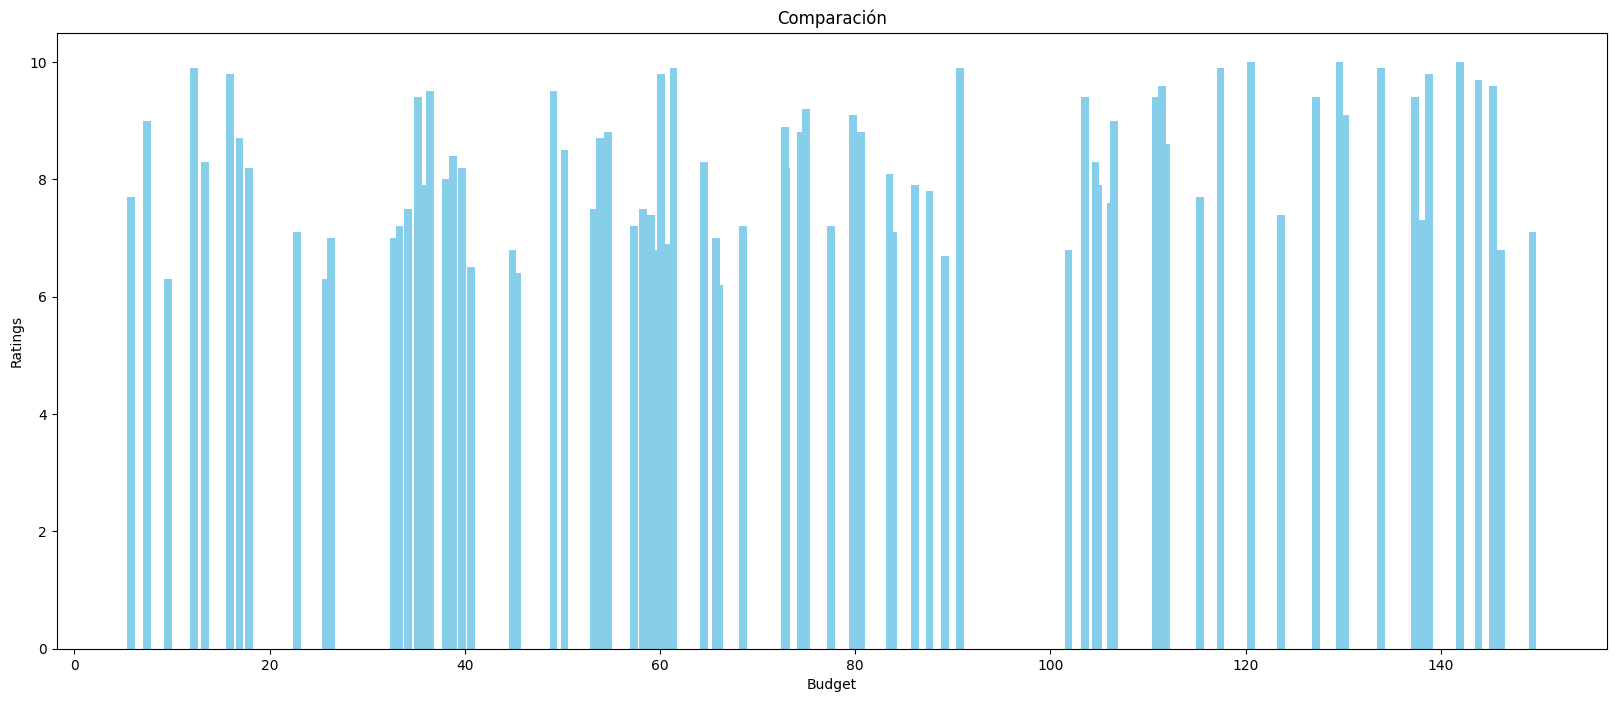

In [20]:
plt.figure(figsize=(20, 8))
plt.bar(anime['Budget (in Million USD)'], anime['Ratings'], color='skyblue')
plt.xlabel("Budget")
plt.ylabel("Ratings")
plt.title("Comparación")
plt.show()

In [27]:
import pandas as pd
anime['Budget Range'] = pd.cut(
    anime['Budget (in Million USD)'], 
    bins=[0, 40, 80, 120, 160], 
    labels=['Bajo', 'Media', 'Alto', 'May Alto']
)

# Mostrar los primeros registros para verificar
anime[['Budget (in Million USD)', 'Budget Range']]

,Budget (in Million USD),Budget Range
0,80.61,Alto
1,74.99,Media
2,59.05,Media
3,45.35,Media
4,15.90,Bajo
...,...,...
95,40.62,Media
96,54.69,Media
97,39.73,Bajo
98,68.53,Media


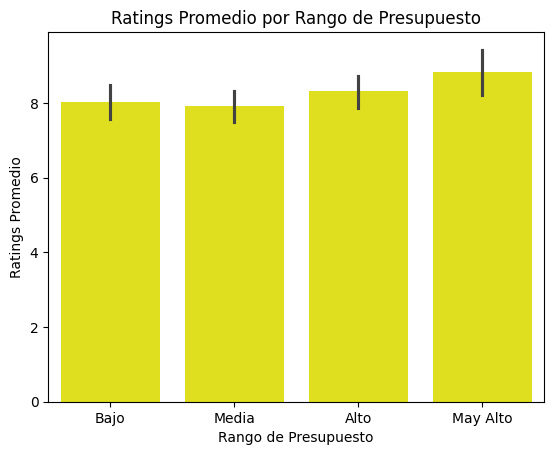

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Budget Range', y='Ratings', data=anime, estimator='mean', color= 'yellow')
plt.xlabel("Rango de Presupuesto")
plt.ylabel("Ratings Promedio")
plt.title("Ratings Promedio por Rango de Presupuesto")
plt.show()

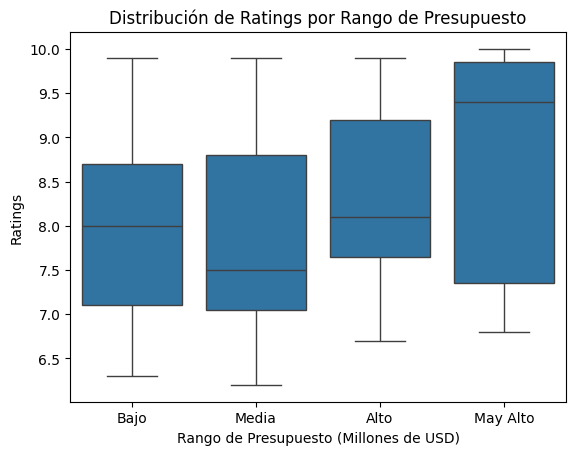

In [48]:
import seaborn as sns
sns.boxplot(x='Budget Range', y='Ratings', data=anime)
plt.xlabel("Rango de Presupuesto (Millones de USD)")
plt.ylabel("Ratings")
plt.title("Distribución de Ratings por Rango de Presupuesto")
plt.show()

# Conclusión

La hipótesis se niega; basándonos en las dos últimas gráficas, donde se sacó el promedio de los ratings comparándolos con su presupuesto en un gráfico de barras, lo anterior se decidió para poder tener un mejor panorama del conjunto de datos y así poder agruparlos en un tipo de inversión. Esta gráfica nos está mostrando que un anime con una inversión mayor tiende a tener un rating ligeramente más alto que uno con menor inversión. Sin embargo, la diferencia en los promedios es muy pequeña, lo que sugiere que la relación no es tan fuerte como se esperaba.
La segunda gráfica muestra la variabilidad de los ratings en cada tipo de inversión. Se observa que hay mayor variabilidad en el grupo de presupuesto alto; lo que nos indica que existen animes con muy buena calificación, pero también con calificaciones muy bajas. Esto se decidió hacer para observar si todos los datos de presupuesto y calificación tienen alguna correlación, y podemos observar que no la tienen. Si existiera una correlación fuerte, no habría una variación tan grande en ese grupo.

